In [423]:
import sympy as sp
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
from math import pi, cos, sin
golden_ratio = (1 + 5 ** 0.5) / 2

In [424]:
exterior = [0,2,4,6,8]
interior = [1,3,5,7,9]
states = np.arange(10)

In [425]:
adjacency = np.zeros((10,10))
for i in range(5):
    adjacency[interior[i],interior[(i+1)%5]] += 1
    adjacency[interior[i],exterior[i]] += 1
    adjacency[interior[i],exterior[(i+1)%5]] += 1
adjacency += adjacency.T

sp.print_latex(sp.Matrix(adjacency.astype(int)))

\left[\begin{matrix}0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 1\\0 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 1 & 1 & 0 & 1 & 1 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 1 & 1 & 0 & 1 & 1\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 1\\1 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 0\end{matrix}\right]


In [426]:
holding_rates = np.array([i+1 for i in range(10)])
Q_matrix = -np.diag(holding_rates).astype(float)
Q_matrix += adjacency * (holding_rates / adjacency.sum(axis=1))[:,None]

sp.nsimplify(sp.Matrix(Q_matrix), tolerance=0.001, rational=True)

Matrix([
[ -1, 1/2,   0,   0,   0,   0,   0,   0,   0, 1/2],
[1/2,  -2, 1/2, 1/2,   0,   0,   0,   0,   0, 1/2],
[  0, 3/2,  -3, 3/2,   0,   0,   0,   0,   0,   0],
[  0,   1,   1,  -4,   1,   1,   0,   0,   0,   0],
[  0,   0,   0, 5/2,  -5, 5/2,   0,   0,   0,   0],
[  0,   0,   0, 3/2, 3/2,  -6, 3/2, 3/2,   0,   0],
[  0,   0,   0,   0,   0, 7/2,  -7, 7/2,   0,   0],
[  0,   0,   0,   0,   0,   2,   2,  -8,   2,   2],
[  0,   0,   0,   0,   0,   0,   0, 9/2,  -9, 9/2],
[5/2, 5/2,   0,   0,   0,   0,   0, 5/2, 5/2, -10]])

In [427]:
jump_matrix = adjacency / adjacency.sum(axis=1)[:,None]
sp.print_latex(sp.nsimplify(sp.Matrix(jump_matrix), tolerance=0.001, rational=True))

\left[\begin{matrix}0 & \frac{1}{2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{2}\\\frac{1}{4} & 0 & \frac{1}{4} & \frac{1}{4} & 0 & 0 & 0 & 0 & 0 & \frac{1}{4}\\0 & \frac{1}{2} & 0 & \frac{1}{2} & 0 & 0 & 0 & 0 & 0 & 0\\0 & \frac{1}{4} & \frac{1}{4} & 0 & \frac{1}{4} & \frac{1}{4} & 0 & 0 & 0 & 0\\0 & 0 & 0 & \frac{1}{2} & 0 & \frac{1}{2} & 0 & 0 & 0 & 0\\0 & 0 & 0 & \frac{1}{4} & \frac{1}{4} & 0 & \frac{1}{4} & \frac{1}{4} & 0 & 0\\0 & 0 & 0 & 0 & 0 & \frac{1}{2} & 0 & \frac{1}{2} & 0 & 0\\0 & 0 & 0 & 0 & 0 & \frac{1}{4} & \frac{1}{4} & 0 & \frac{1}{4} & \frac{1}{4}\\0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{2} & 0 & \frac{1}{2}\\\frac{1}{4} & \frac{1}{4} & 0 & 0 & 0 & 0 & 0 & \frac{1}{4} & \frac{1}{4} & 0\end{matrix}\right]


In [428]:
desired_eigenvalue = 0
def get_left_eigenvector(matrix, desired_eigenvalue):
    eigenvalues, multiplicity, eigenvectors = list(zip(*sp.Matrix(matrix.T).eigenvects()))

    solution_index = np.argmin(np.abs(desired_eigenvalue - np.array(eigenvalues)))
    solution = eigenvectors[solution_index][0]
    solution = solution / sum(solution)
    return sp.nsimplify(solution.T.simplify(), tolerance=0.0001, rational= True)
    
mu_invariant = get_left_eigenvector(jump_matrix, 1)
display(mu_invariant)
mu_invariant = np.array(mu_invariant).astype(float)[0]

Matrix([[1/15, 2/15, 1/15, 2/15, 1/15, 2/15, 1/15, 2/15, 1/15, 2/15]])

In [429]:
lambda_invariant = get_left_eigenvector(Q_matrix, 0)
display(lambda_invariant)
lambda_invariant = np.array(lambda_invariant).astype(float)[0]

Matrix([[1260/5129, 1260/5129, 420/5129, 630/5129, 252/5129, 420/5129, 180/5129, 315/5129, 140/5129, 252/5129]])

In [430]:
P_matrix = sci.linalg.expm(Q_matrix)
lambda_invariant_1 = get_left_eigenvector(P_matrix, 1)

In [431]:
transition_matrix = np.diag(1-1/holding_rates)
transition_matrix += jump_matrix * (1/holding_rates)[:,None]
sp.nsimplify(sp.Matrix(transition_matrix), tolerance=0.001, rational=True)

Matrix([
[   0,  1/2,    0,    0,    0,    0,    0,    0,    0,  1/2],
[ 1/8,  1/2,  1/8,  1/8,    0,    0,    0,    0,    0,  1/8],
[   0,  1/6,  2/3,  1/6,    0,    0,    0,    0,    0,    0],
[   0, 1/16, 1/16,  3/4, 1/16, 1/16,    0,    0,    0,    0],
[   0,    0,    0, 1/10,  4/5, 1/10,    0,    0,    0,    0],
[   0,    0,    0, 1/24, 1/24,  5/6, 1/24, 1/24,    0,    0],
[   0,    0,    0,    0,    0, 1/14,  6/7, 1/14,    0,    0],
[   0,    0,    0,    0,    0, 1/32, 1/32,  7/8, 1/32, 1/32],
[   0,    0,    0,    0,    0,    0,    0, 1/18,  8/9, 1/18],
[1/40, 1/40,    0,    0,    0,    0,    0, 1/40, 1/40, 9/10]])

In [432]:
transition_invariant = get_left_eigenvector(transition_matrix, 1)
display(transition_invariant)
transition_invariant = np.array(transition_invariant).astype(float)[0]

Matrix([[1/85, 4/85, 3/85, 8/85, 1/17, 12/85, 7/85, 16/85, 9/85, 4/17]])

In [433]:
T = 100 # max time
N = 100 # number of trajectories

In [434]:
trajectories = []
for trajectory_index in range(N):
    current_time = 0
    time_list = [current_time]
    state_list = [5]# [np.random.choice(states, p=mu_invariant)]

    while current_time < T:
        current_state = state_list[-1]
        current_rate = holding_rates[current_state]
        current_time += np.random.exponential(scale=1/holding_rates[current_state])
        time_list.append(current_time)
        next_state = np.random.choice(states, p=jump_matrix[current_state])
        state_list.append(next_state)
    state_list = np.array(state_list)
    time_list = np.array(time_list)
    trajectories.append((time_list, state_list))

In [435]:
def get_visit_frequency(trajectory):
    trajectory = trajectories[0]
    time_list, state_list = trajectory
    state_list = state_list[:-1]
    values, indices, counts = np.unique(state_list[state_list.argsort()], return_counts=True, return_index=True)
    
    visit_frequency = counts/counts.sum()
    return visit_frequency

def get_average_visit_length(trajectory):
    trajectory = trajectories[0]
    time_list, state_list = trajectory
    state_list = state_list[:-1]
    visit_lengths = time_list[1:] - time_list[:-1]
    values, indices, counts = np.unique(state_list[state_list.argsort()], return_counts=True, return_index=True)
    visit_times_grouped = np.split(time_list[:-1][state_list.argsort()], indices)[1:] 
    visit_times_grouped = [np.sort(visit_times_grouped[k]) for k in range(10)]
    visit_lengths_grouped = np.split(visit_lengths[state_list.argsort()], indices)[1:] 

    average_visit_length = np.array([visit_lengths_grouped[k].mean() for k in range(10)])
    return average_visit_length

def get_average_excursion_length(trajectory):
    time_list, state_list = trajectory
    state_list = state_list[:-1]
    visit_lengths = time_list[1:] - time_list[:-1]
    values, indices, counts = np.unique(state_list[state_list.argsort()], return_counts=True, return_index=True)

    visit_times_grouped = np.split(time_list[:-1][state_list.argsort()], indices)[1:] 
    visit_times_grouped = [np.sort(visit_times_grouped[k]) for k in range(10)]
    excursion_lengths_grouped = [visit_times_grouped[k][1:]- visit_times_grouped[k][:-1] for k in range(10)]

    average_excursion_length = np.array([excursion_lengths_grouped[k].mean() for k in range(10)])
    return average_excursion_length

[Text(0.175, 0, '0'),
 Text(1.175, 0, '1'),
 Text(2.175, 0, '2'),
 Text(3.175, 0, '3'),
 Text(4.175, 0, '4'),
 Text(5.175, 0, '5'),
 Text(6.175, 0, '6'),
 Text(7.175, 0, '7'),
 Text(8.175, 0, '8'),
 Text(9.175, 0, '9')]

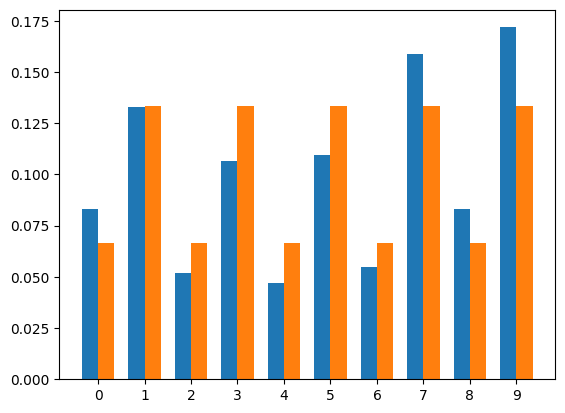

In [436]:
visit_frequencies = np.array([get_visit_frequency(trajectory) for trajectory in trajectories])
average_visit_frequency = visit_frequencies.mean(axis = 0)

bar_width = 0.35
x = range(len(average_visit_frequency))

fig, ax = plt.subplots()
bar1 = ax.bar(x, average_visit_frequency, bar_width, label=r'$\hat{\mu}_i = \frac{1}{m}\sum_{j = 0}^{m} 1(X^j = i)$')
bar2 = ax.bar([i + bar_width for i in x], mu_invariant, bar_width, label=r"$\mu_i$")

ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels([str(i) for i in range(len(average_visit_frequency))])

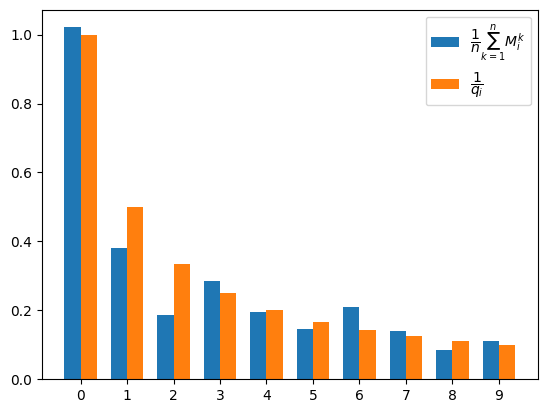

In [437]:
average_visit_length = np.array([get_average_visit_length(trajectory) for trajectory in trajectories]).mean(axis = 0)
expected_visit_lengths = [1/holding_rates[k] for k in range(10)]
bar_width = 0.35
x = range(len(average_visit_length))

fig, ax = plt.subplots()
bar1 = ax.bar(x, average_visit_length, bar_width, label=r'$\dfrac{1}{n}\sum_{k = 1}^n M_i^k$')
bar2 = ax.bar([i + bar_width for i in x], expected_visit_lengths, bar_width, label=r"$\dfrac{1}{q_i}$")

ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels([str(i) for i in range(len(average_visit_length))])
ax.legend()

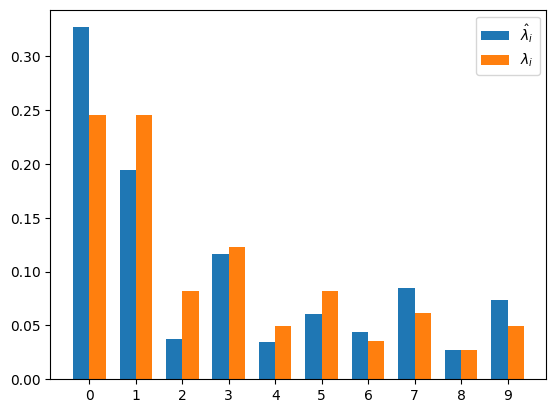

In [438]:
lambda_estimated_1 = average_visit_frequency*average_visit_length
lambda_estimated_1 = lambda_estimated_1 / lambda_estimated_1.sum()

bar_width = 0.35
x = range(len(lambda_estimated_1))

fig, ax = plt.subplots()
bar1 = ax.bar(x, lambda_estimated_1, bar_width, label=r'$\hat{\lambda}_i$')
bar2 = ax.bar([i + bar_width for i in x], lambda_invariant, bar_width, label=r"$\lambda_i$")

ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels([str(i) for i in range(len(lambda_estimated_1))])
ax.legend()

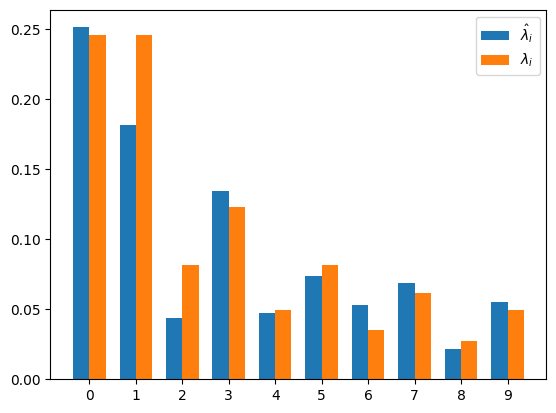

In [439]:
average_excursion_length = np.array([get_average_excursion_length(trajectory) for trajectory in trajectories]).mean(axis = 0)

lambda_estimated_2 = average_visit_length/average_excursion_length

bar_width = 0.35
x = range(len(lambda_estimated_2))

fig, ax = plt.subplots()
bar1 = ax.bar(x, lambda_estimated_2, bar_width, label=r'$\hat{\lambda}_i$')
bar2 = ax.bar([i + bar_width for i in x], lambda_invariant, bar_width, label=r"$\lambda_i$")

ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels([str(i) for i in range(len(lambda_estimated_2))])
ax.legend()

In [520]:
T = 1000 # max time
N = 100 # number of trajectories
trajectories = []

for trajectory_index in range(N): # simulating N trajectories
    state_list = [np.random.choice(states, p=transition_invariant)]
    for t in range(T):
        current_state = state_list[-1]
        next_state = np.random.choice(states, p=transition_matrix[current_state])
        state_list.append(next_state)
    state_list = np.array(state_list)
    trajectories.append(state_list)

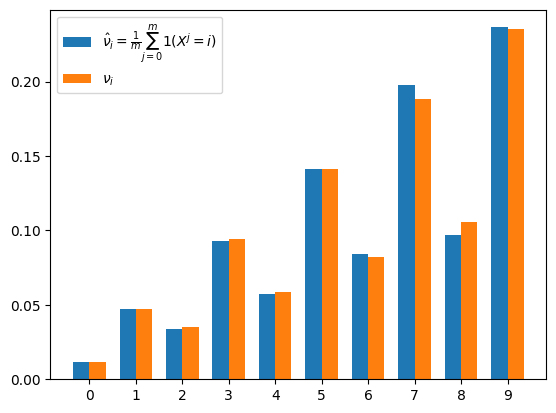

In [521]:
visit_frequencies = []
for k in range(N):
    state_list = trajectories[k][:-1]
    values, indices, counts = np.unique(state_list[state_list.argsort()], return_counts=True, return_index=True)
    visit_frequency = np.zeros((10,))
    visit_frequency[values] = counts
    visit_frequencies.append(visit_frequency)
average_visit_frequency = np.array(visit_frequencies).mean(axis = 0)
average_visit_frequency = average_visit_frequency/average_visit_frequency.sum()

bar_width = 0.35
x = range(len(average_visit_frequency))

fig, ax = plt.subplots()
bar1 = ax.bar(x, average_visit_frequency, bar_width, label=r'$\hat{\nu}_i = \frac{1}{m}\sum_{j = 0}^{m} 1(X^j = i)$')
bar2 = ax.bar([i + bar_width for i in x], transition_invariant, bar_width, label=r"$\nu_i$")

ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels([str(i) for i in range(len(average_visit_frequency))])
ax.legend()